<b> Load the required packages </b>

1. Pandas and NumPy for handling data
2. SciPy for statistical operations
3. Seaborn and Matplotlib for data visualization

In [200]:
import pandas as pd
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [201]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

<b> Load the dataset </b>

In [202]:
df = pd.read_csv('candy-data.csv')


## About the dataset:

1. chocolate | Does it contain chocolate?
2. fruity | Is it fruit flavored?
3. caramel | Is there caramel in the candy?
4. peanutalmondy | Does it contain peanuts, peanut butter or almonds?
5. nougat | Does it contain nougat?
6. crispedricewafer | Does it contain crisped rice, wafers, or a cookie component?
7. hard | Is it a hard candy?
8. bar | Is it a candy bar?
9. pluribus | Is it one of many candies in a bag or box?
10. sugarpercent | The percentile of sugar it falls under within the data set.
11. pricepercent | The unit price percentile compared to the rest of the set.
12. winpercent | The overall win percentage according to 269,000 matchups.

For binary variables, 1 means yes, 0 means no.

In [222]:
# Creating a list of characteristics
characteristics = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']

## Explore the dataset

1. Shape of the dataset
2. First and last few rows of the dataset
3. Datatypes of the variables
4. Check for missing/null values

In [223]:
# Print the shape of the dataset
df.shape

(85, 13)

In [224]:
# Print the first 5 rows of the dataset
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [225]:
# Print the last 5 rows of the dataset
df.tail()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308
84,Whoppers,1,0,0,0,0,1,0,0,1,0.872,0.848,49.524113


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [207]:
# Check for null values in the df
df.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

## Univariate analysis

1. How many times does an ingredient appear in the 85 candies?
2. Which are the top 20 candies according to 'winpercent'?
3. Which are the bottom 20 candies according to the 'winpercent'?
4. 

In [209]:
# How many times does an ingredient appear in the 85 candies?
df[df.columns[1:-3]].agg(['sum'])

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
sum,37,38,14,14,7,7,15,21,44


In [212]:
corr_df = pd.DataFrame([(f1, f2, df.corr()[f1].loc[f2]) for (f1, f2) in itertools.combinations(df.columns[1:].sort_values(), 2)],
             columns=['feature1', 'feature2', 'corr']).sort_values('corr')
corr_df = corr_df.iloc[(-corr_df['corr'].abs()).argsort()].reset_index(drop=True)
corr_df[:10]

,feature1,feature2,corr
0,chocolate,fruity,-0.741721
1,chocolate,winpercent,0.636517
2,bar,chocolate,0.597421
3,bar,pluribus,-0.593409
4,bar,nougat,0.522976
5,bar,pricepercent,0.518407
6,bar,fruity,-0.515066
7,chocolate,pricepercent,0.504675
8,fruity,pricepercent,-0.430969
9,bar,winpercent,0.429929


In [213]:
corr_df[(corr_df.feature1 == 'winpercent') | (corr_df.feature2 == 'winpercent')]

,feature1,feature2,corr
1,chocolate,winpercent,0.636517
9,bar,winpercent,0.429929
11,peanutyalmondy,winpercent,0.406192
14,fruity,winpercent,-0.380938
16,pricepercent,winpercent,0.345325
25,crispedricewafer,winpercent,0.324680
26,hard,winpercent,-0.310382
38,pluribus,winpercent,-0.247448
40,sugarpercent,winpercent,0.229151
44,caramel,winpercent,0.213416


In [229]:
# Which are the top 20 candies according to "winpercent"?
# Since chocolate shows the highest correlation with winpercent, we check which candies are in the top 20
df[['competitorname', 'chocolate', 'winpercent']].sort_values('winpercent', ascending=False)[:20]

,competitorname,chocolate,winpercent
52,ReeseÕs Peanut Butter cup,1,84.180290
51,ReeseÕs Miniatures,1,81.866257
79,Twix,1,81.642914
28,Kit Kat,1,76.768600
64,Snickers,1,76.673782
53,ReeseÕs pieces,1,73.434990
36,Milky Way,1,73.099556
54,ReeseÕs stuffed with pieces,1,72.887901
32,Peanut butter M&MÕs,1,71.465050
42,Nestle Butterfinger,1,70.735641


In [211]:
# Which are the lowest 20 candies according to "winpercent"
df.sort_values('winpercent', ascending=True)[:20]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
44,Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
72,Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
26,Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,29.703691
71,Sugar Daddy,0,0,1,0,0,0,0,0,0,0.418,0.325,32.230995
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550
19,Haribo Happy Cola,0,0,0,0,0,0,0,0,1,0.465,0.465,34.158958


## Obeservations:

1. In the top 20 candies according to winpercent, chocolate appears in almost all candies except for 2. On the contrary, in the bottom 20 candies, chocolate appears only 3 times. This shows that according to winpercent, chocolate is definitely an ingredient that needs to be included in our new candy.
2. In the bottom 20 candies, only 2 candies are

<b> How do all the other variables correlate with each other? </b>
<b> What are the top 10 positive and negative correlations among the variables? </b>

Since we are interested in which candy to introduce in the market, winpercent seems to be the perfect parameter to gauge the popularity of a candy. 
Therefore,

<b> How does the winpercent correlate with the other variables? </b>



<b> Which characteristics, ingredients(chocolate, fruity, caramel, peanutyalmondy) or physical(nougat, crispedricewafer, hard) or quantity(bar, pluribus) appear more frequently? </b>

<b> 1. Ingredients: <br>
--> fruit appears most frequently appearing ingredient
--> do fruits and chocolates go together? 
--> do chocolates and caramel go together?
--> what about peanuts? <br> 
2. Physical:
--> 

3. quantity: <br>
Most of the candies are not bars, but rather appear in packets similar to M&Ms </b>
    

## Exploratory Data Analysis

1. How do the different candies compare according to the contents?
2. Which candy is more likely to win a matchup against its competitors based on its contents?

<AxesSubplot:xlabel='winpercent', ylabel='competitorname'>

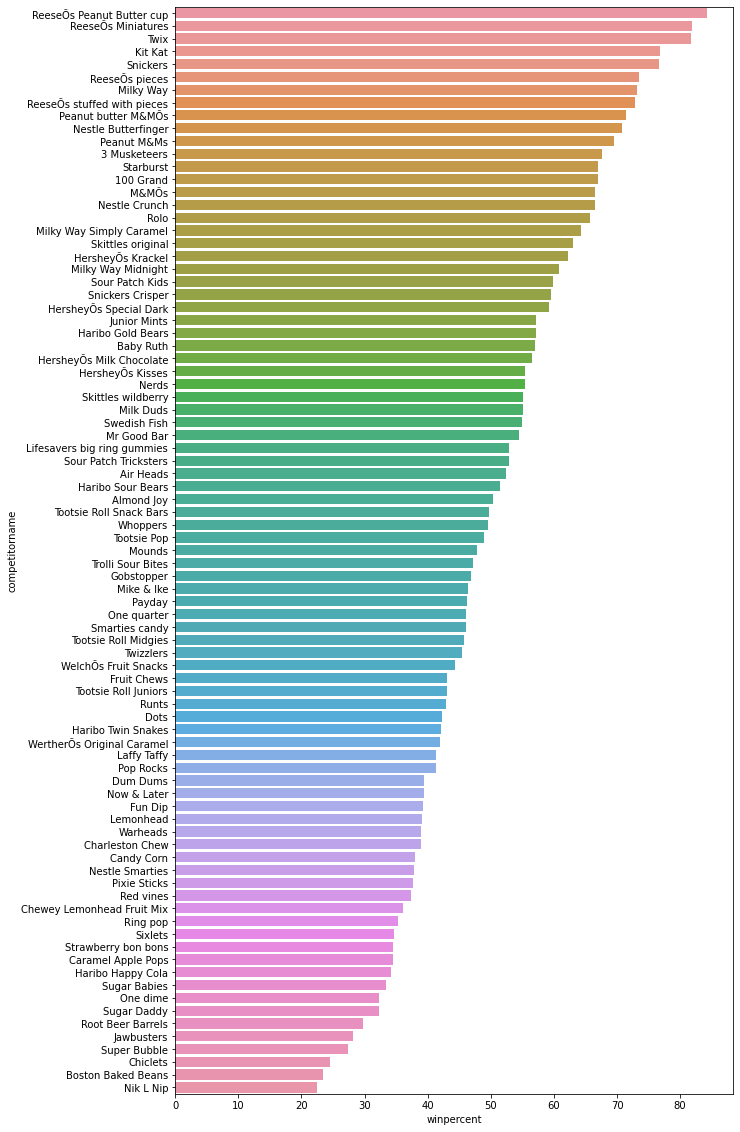

In [214]:
# To check if there are absolute out-and-out winners? 

plt.figure(figsize=(10,20))
sns.barplot(x = df['winpercent'], y = df['competitorname'], order = df.sort_values('winpercent',ascending = False).competitorname)

there are no outright winners or losers according to winpercent, however, a large number of the top 10 candies (6?) contain peanut/ peanut butter. 

also, Reese's peanture butter cup seems to come out on top > 70 percent of the time it comes up in a match up

In [215]:
# z = []
# for i in df['pricepercent']:
#     if i > 0.70:
#         print(i)
#         z.append(i)

In [216]:
d = df[df['winpercent'] > 65]

In [217]:
top_10_winners =  df.sort_values('winpercent', ascending=False)[:20]
sum_total_occurrence = top_10_winners.agg(['sum'])

In [218]:
sum_total_occurrence = sum_total_occurrence.drop(['competitorname'], axis = 1)

In [219]:
sum_total_occurrence

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
sum,18,2,6,8,3,5,0,10,7,12.0,12.887,1422.33557


<b> How do the different ingredients compare with: </b>
1. pricepercent
2. winpercent
3. sugarpercent?


1. <b> how does sugarcontent compare with pricepercent? </b> 
2. <b> how does sugarcontent compare with winpercent? </b>
3. <b> how does price compare with winpercent? </b>
4. <b> Identify other important characteristics </b> <br>
5. Apart from chocolate, what other ingredients of properties are best suited for the to be introduced candies?
    What are the top and botom 25 percent characteristics? 

In [237]:
# top_25 = [float(segment_values[3][k]) for k in ]

<b> Answer the following questions </b>

1. How many candies contain chocolate?
2. How many candies are fruity?
3. How many candies have caramel?
4. How many candies contain peanutyalmondy?
5. How many candies contain nougat?
6. How many candies contain crispedricewafer
7. How many candies are hard?
8. How many candies are bars?
9. How many candies are pluribus (contained in multiple quantities in a packet)?

Text(0.5, 1.0, 'pluribus')

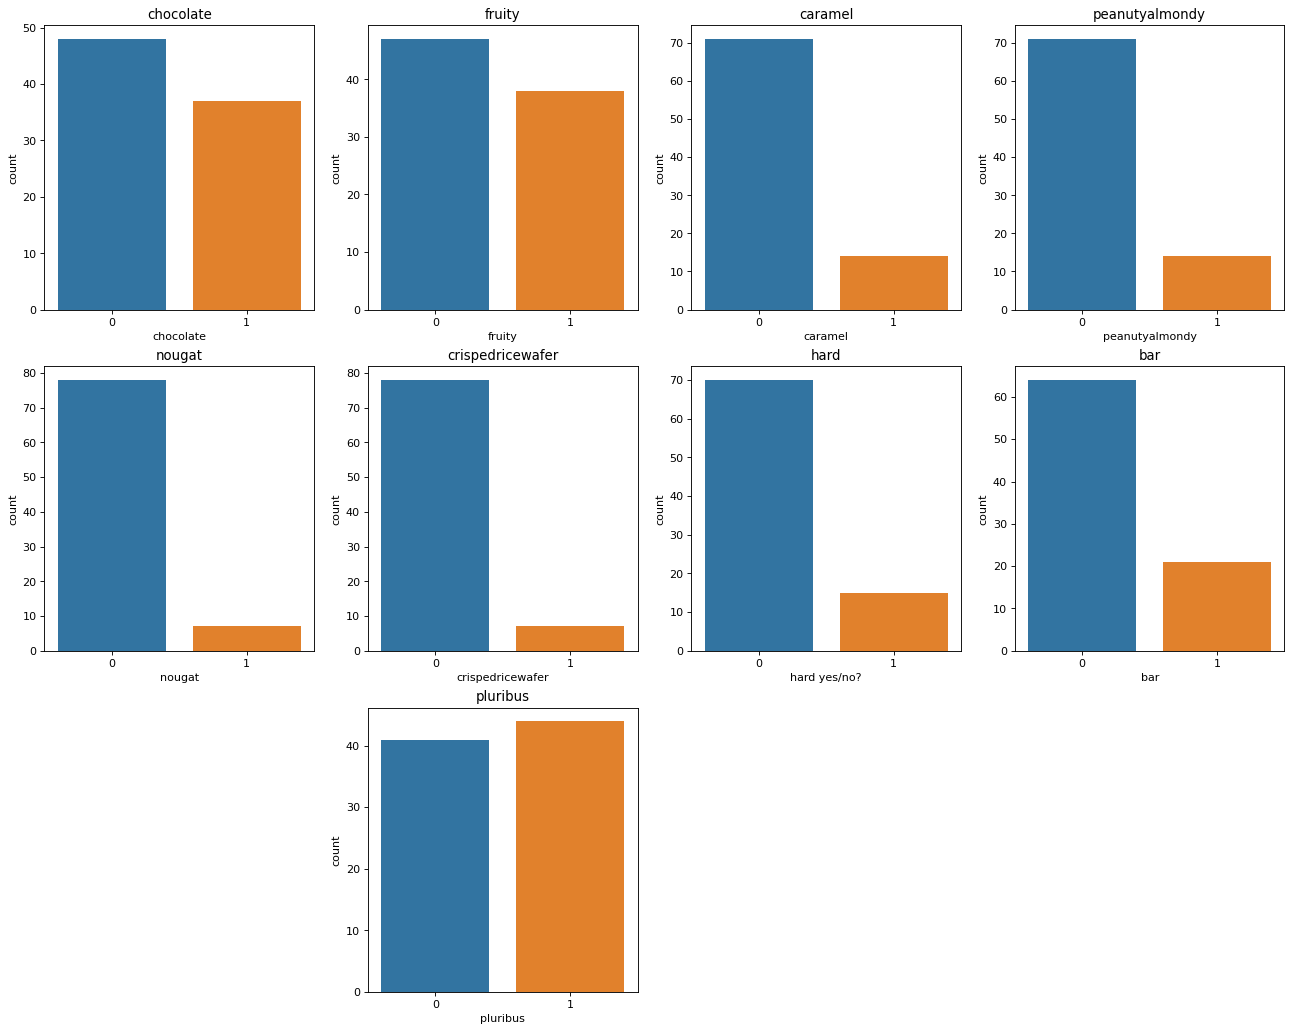

In [236]:
characteristics = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']

plt.figure(figsize = (20,16), dpi = 80)
plt.subplot(3,4,1)
sns.countplot(x='chocolate', data = df)
plt.title('chocolate')

plt.subplot(3,4,2)
sns.countplot(x='fruity', data = df)
plt.title('fruity')

plt.subplot(3,4,3)
sns.countplot(x='caramel', data = df)
plt.title('caramel')

plt.subplot(3,4,4)
sns.countplot(x='peanutyalmondy', data = df)
plt.title('peanutyalmondy')

plt.subplot(3,4,5)
sns.countplot(x='nougat', data = df)
plt.title('nougat')

plt.subplot(3,4,6)
sns.countplot(x='crispedricewafer', data = df)
plt.title('crispedricewafer')

plt.subplot(3,4,7)
sns.countplot(x='hard', data = df)
plt.title('hard')

plt.subplot(3,4,8)
sns.countplot(x='bar', data = df)
plt.title('bar')

plt.subplot(3,4,10)
sns.countplot(x='pluribus', data = df)
plt.title('pluribus')




# question:
Is there a candy which that is extremely popular and does not fit any of the norms of our findings?